# Analysis of Housing Data

**Goal:** Ultimately the goal of this data analysis project is to create a regression model that accurately depicts home prices based on house characteristics. 
<br> <u>Subtasks</u>:
<br> &emsp; 1. Showcase and expand my knowledge of the seaborn package.

In [109]:
__author__ = "Neal Kapur"
import pandas as pd 
import sys
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import seaborn as sns
from scipy.stats import pearsonr
import warnings 

In [110]:
df = pd.read_csv("/Users/nealk/DataScience/data_analytics/data/housing_data.csv")

## Data Cleaning

In [111]:
df.date = pd.to_datetime(df.date) # Convert the date column to the correct format
# Change the format of statezip column

Seperate the state and zip code data in the dataframe

In [112]:

df['state'] = df.statezip.str.split(' ', expand = True)[0]
df['zip'] = df.statezip.str.split(' ', expand = True)[1]
df = df.drop(columns = ['statezip'], axis=1)

In [113]:
df = df.astype({'street': 'string', 'city': 'string', 'country': 'string', 'state': 'string', 'zip': 'int'})

Create Indicator Columns
For: Renovation, Basement

In [114]:
df['is_renovated'] = np.where(df['yr_renovated'] > 0, 'Yes', 'No')
df['has_basement'] = np.where(df['sqft_basement'] > 0, 'Yes', 'No')

In [115]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,yr_renovated,street,city,country,state,zip,is_renovated,has_basement
0,2014-05-02,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,...,0,1955,2005,18810 Densmore Ave N,Shoreline,USA,WA,98133,Yes,No
1,2014-05-02,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,...,280,1921,0,709 W Blaine St,Seattle,USA,WA,98119,No,Yes
2,2014-05-02,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,...,0,1966,0,26206-26214 143rd Ave SE,Kent,USA,WA,98042,No,No
3,2014-05-02,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,...,1000,1963,0,857 170th Pl NE,Bellevue,USA,WA,98008,No,Yes
4,2014-05-02,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,...,800,1976,1992,9105 170th Ave NE,Redmond,USA,WA,98052,Yes,Yes


## EDA 

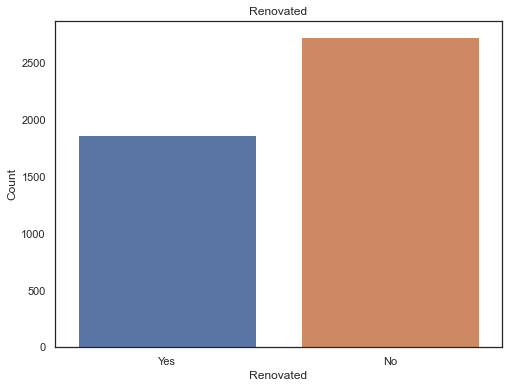

In [141]:
sns.countplot(data=df, x='is_renovated')
plt.xlabel('Renovated')
plt.ylabel('Count')
plt.title('Renovated')
plt.show()

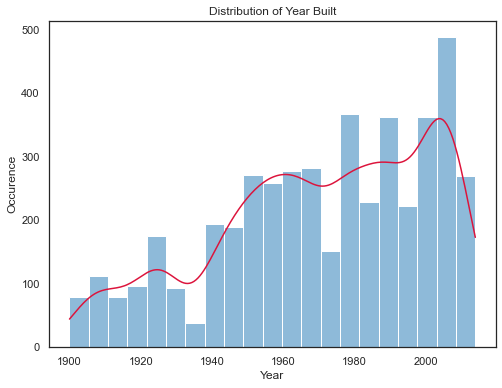

In [134]:
matplotlib.rcParams['figure.figsize'] = [8, 6]
sns.set_style(style='white') 
ax = sns.histplot(data = df, x = 'yr_built', kde = True, color = '#1f77b4')
ax.lines[0].set_color('crimson')
plt.xlabel('Year')
plt.ylabel('Occurence')
plt.title('Distribution of Year Built')
plt.show()

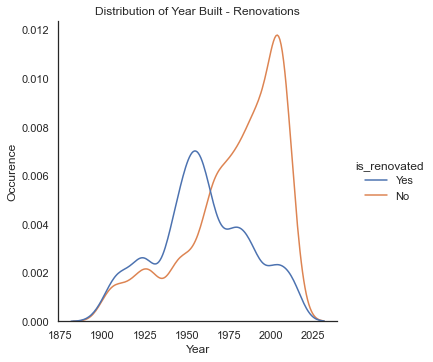

In [121]:
matplotlib.rcParams['figure.figsize'] = [8, 6]
sns.displot(data = df, x = 'yr_built', kind = 'kde', color = 'blue', hue='is_renovated')
plt.xlabel('Year')
plt.ylabel('Occurence')
plt.title('Distribution of Year Built - Renovations')
plt.show()

**Distribution of Year Built:** The two plots depict the distribution of houses based on their year built, with one plot showing all houses and the other distinguishing between renovated and non-renovated houses. The analysis indicates that non-renovated houses, on average, tend to have been built more recently compared to renovated houses.

In [119]:
list(df.columns)

['date',
 'price',
 'bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'view',
 'condition',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'street',
 'city',
 'country',
 'state',
 'zip',
 'is_renovated',
 'has_basement']